In [1]:
!pip install pyforest

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('titanic_dataset.csv',delimiter=',')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
data.sum()

C:\Users\pavan\AppData\Local\Temp\ipykernel_1880\1263598667.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.sum()


PassengerId                                               460009
Survived                                                     152
Pclass                                                       947
Name           Kelly, Mr. JamesWilkes, Mrs. James (Ellen Need...
Sex            malefemalemalemalefemalemalefemalemalefemalema...
Age                                                      10050.5
SibSp                                                        187
Parch                                                        164
Ticket         3309113632722402763151543101298753833097224873...
Fare                                                  14856.5376
Embarked       QSQSSSQSCSSSSSSCQCSCCSSCCSCCSCSSSSCCSSSSCSSSSS...
dtype: object

In [9]:
data.shape

(418, 12)

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [12]:
data.rename({'Sex':'Gender'},axis=1,inplace=True)
data

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
s=data.drop(['Cabin','Pclass','SibSp'],axis=1,inplace=True)
data

,PassengerId,Survived,Name,Gender,Age,Parch,Ticket,Fare,Embarked
0,892,0,"Kelly, Mr. James",male,34.5,0,330911,7.8292,Q
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,0,363272,7.0000,S
2,894,0,"Myles, Mr. Thomas Francis",male,62.0,0,240276,9.6875,Q
3,895,0,"Wirz, Mr. Albert",male,27.0,0,315154,8.6625,S
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,"Spector, Mr. Woolf",male,NaN,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,PC 17758,108.9000,C
415,1307,0,"Saether, Mr. Simon Sivertsen",male,38.5,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,"Ware, Mr. Frederick",male,NaN,0,359309,8.0500,S


In [14]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Gender']=label_encoder.fit_transform(data['Gender'])
data['Gender'].value_counts()



1    266
0    152
Name: Gender, dtype: int64

In [15]:
data.count()

PassengerId    418
Survived       418
Name           418
Gender         418
Age            332
Parch          418
Ticket         418
Fare           417
Embarked       418
dtype: int64

In [16]:
data

,PassengerId,Survived,Name,Gender,Age,Parch,Ticket,Fare,Embarked
0,892,0,"Kelly, Mr. James",1,34.5,0,330911,7.8292,Q
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,0,363272,7.0000,S
2,894,0,"Myles, Mr. Thomas Francis",1,62.0,0,240276,9.6875,Q
3,895,0,"Wirz, Mr. Albert",1,27.0,0,315154,8.6625,S
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,"Spector, Mr. Woolf",1,NaN,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,PC 17758,108.9000,C
415,1307,0,"Saether, Mr. Simon Sivertsen",1,38.5,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,"Ware, Mr. Frederick",1,NaN,0,359309,8.0500,S


In [17]:
data['Age'].median()

27.0

In [18]:
data['Age'].fillna(value=27,inplace=True)

In [19]:
data['Age'].isnull().sum()

0

In [20]:
data.isnull().sum()

PassengerId    0
Survived       0
Name           0
Gender         0
Age            0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [21]:
data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [22]:
k=data.groupby('Survived')
k['Embarked'].value_counts()

Survived  Embarked
0         S           182
          C            62
          Q            22
1         S            88
          C            40
          Q            24
Name: Embarked, dtype: int64

In [23]:
# i think not use for this syntax in Embarked column because no null values.
# data['Embarked'].fillna(value='k',inplace=True)
# data

In [24]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Embarked']=label_encoder.fit_transform(data['Embarked'])
data['Embarked'].value_counts()                                         
                                             

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [25]:
data

,PassengerId,Survived,Name,Gender,Age,Parch,Ticket,Fare,Embarked
0,892,0,"Kelly, Mr. James",1,34.5,0,330911,7.8292,1
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,0,363272,7.0000,2
2,894,0,"Myles, Mr. Thomas Francis",1,62.0,0,240276,9.6875,1
3,895,0,"Wirz, Mr. Albert",1,27.0,0,315154,8.6625,2
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,1305,0,"Spector, Mr. Woolf",1,27.0,0,A.5. 3236,8.0500,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,PC 17758,108.9000,0
415,1307,0,"Saether, Mr. Simon Sivertsen",1,38.5,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,"Ware, Mr. Frederick",1,27.0,0,359309,8.0500,2


In [26]:
data.isnull().sum()

PassengerId    0
Survived       0
Name           0
Gender         0
Age            0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [27]:
data['Fare'].median()

14.4542

In [28]:
data['Fare'].fillna(value=14.4542,inplace=True)
data

,PassengerId,Survived,Name,Gender,Age,Parch,Ticket,Fare,Embarked
0,892,0,"Kelly, Mr. James",1,34.5,0,330911,7.8292,1
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,0,363272,7.0000,2
2,894,0,"Myles, Mr. Thomas Francis",1,62.0,0,240276,9.6875,1
3,895,0,"Wirz, Mr. Albert",1,27.0,0,315154,8.6625,2
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,1305,0,"Spector, Mr. Woolf",1,27.0,0,A.5. 3236,8.0500,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,PC 17758,108.9000,0
415,1307,0,"Saether, Mr. Simon Sivertsen",1,38.5,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,"Ware, Mr. Frederick",1,27.0,0,359309,8.0500,2


In [29]:
data['Fare'].isnull().sum()

0

In [30]:
data.isnull().sum()

PassengerId    0
Survived       0
Name           0
Gender         0
Age            0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import figure
style.use('fivethirtyeight')

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


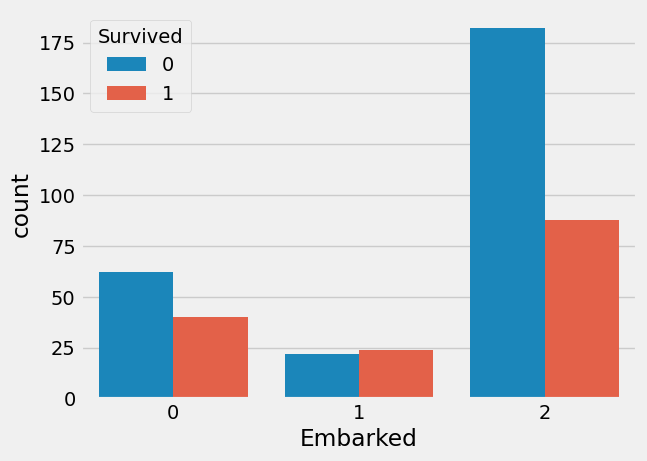

In [32]:
sns.countplot(data['Embarked'],hue=data['Survived'])
plt.show()

In [33]:
data

,PassengerId,Survived,Name,Gender,Age,Parch,Ticket,Fare,Embarked
0,892,0,"Kelly, Mr. James",1,34.5,0,330911,7.8292,1
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,0,363272,7.0000,2
2,894,0,"Myles, Mr. Thomas Francis",1,62.0,0,240276,9.6875,1
3,895,0,"Wirz, Mr. Albert",1,27.0,0,315154,8.6625,2
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,1305,0,"Spector, Mr. Woolf",1,27.0,0,A.5. 3236,8.0500,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,PC 17758,108.9000,0
415,1307,0,"Saether, Mr. Simon Sivertsen",1,38.5,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,"Ware, Mr. Frederick",1,27.0,0,359309,8.0500,2


In [34]:
data.corr()

,PassengerId,Survived,Gender,Age,Parch,Fare,Embarked
PassengerId,1.000000,-0.023245,0.023245,-0.031447,0.043080,0.008633,0.040699
Survived,-0.023245,1.000000,-1.000000,0.008035,0.159120,0.192036,-0.076281
Gender,0.023245,-1.000000,1.000000,-0.008035,-0.159120,-0.192036,0.076281
Age,-0.031447,0.008035,-0.008035,1.000000,-0.043731,0.342357,-0.148051
Parch,0.043080,0.159120,-0.159120,-0.043731,1.000000,0.230325,0.054577
Fare,0.008633,0.192036,-0.192036,0.342357,0.230325,1.000000,-0.257624
Embarked,0.040699,-0.076281,0.076281,-0.148051,0.054577,-0.257624,1.000000


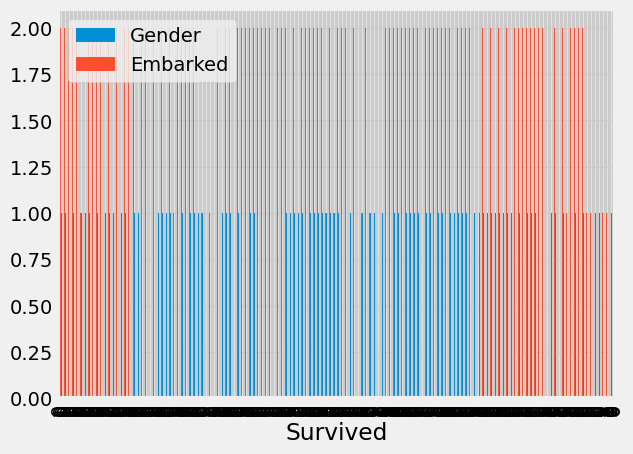

In [35]:
data.plot(x='Survived',y=['Gender','Embarked'],kind='bar')
plt.show()

In [36]:
correlation=data.corr()
correlation['Survived'].sort_values(ascending=False)


Survived       1.000000
Fare           0.192036
Parch          0.159120
Age            0.008035
PassengerId   -0.023245
Embarked      -0.076281
Gender        -1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

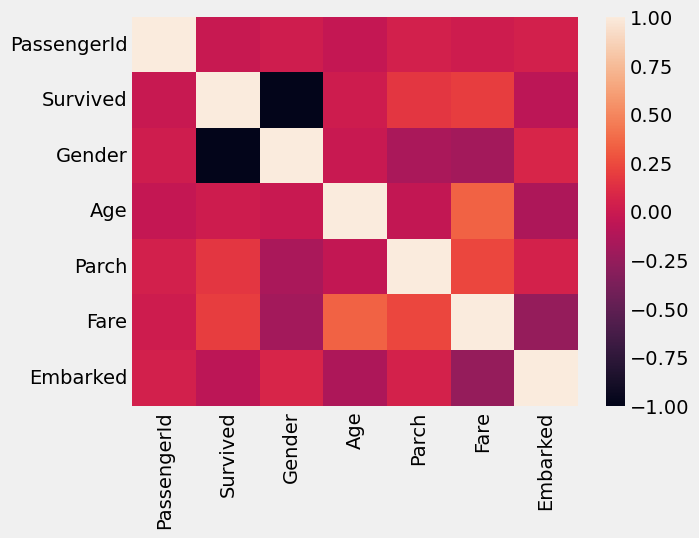

In [37]:
sns.heatmap(data.corr())

In [38]:
correlation['Fare'].sort_values(ascending=False)
correlation['Fare']

PassengerId    0.008633
Survived       0.192036
Gender        -0.192036
Age            0.342357
Parch          0.230325
Fare           1.000000
Embarked      -0.257624
Name: Fare, dtype: float64

In [39]:
data

,PassengerId,Survived,Name,Gender,Age,Parch,Ticket,Fare,Embarked
0,892,0,"Kelly, Mr. James",1,34.5,0,330911,7.8292,1
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,0,363272,7.0000,2
2,894,0,"Myles, Mr. Thomas Francis",1,62.0,0,240276,9.6875,1
3,895,0,"Wirz, Mr. Albert",1,27.0,0,315154,8.6625,2
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,1305,0,"Spector, Mr. Woolf",1,27.0,0,A.5. 3236,8.0500,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,PC 17758,108.9000,0
415,1307,0,"Saether, Mr. Simon Sivertsen",1,38.5,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,"Ware, Mr. Frederick",1,27.0,0,359309,8.0500,2


In [40]:
data['family']=data['Gender']+data['Embarked']+1
data=data.drop(['Embarked','Gender'],axis=1)
data=data.drop('Name',axis=1)
data=data.drop('Ticket',axis=1)
data

,PassengerId,Survived,Age,Parch,Fare,family
0,892,0,34.5,0,7.8292,3
1,893,1,47.0,0,7.0000,3
2,894,0,62.0,0,9.6875,3
3,895,0,27.0,0,8.6625,4
4,896,1,22.0,1,12.2875,3
...,...,...,...,...,...,...
413,1305,0,27.0,0,8.0500,4
414,1306,1,39.0,0,108.9000,1
415,1307,0,38.5,0,7.2500,4
416,1308,0,27.0,0,8.0500,4


In [47]:
data

,PassengerId,Survived,Age,Parch,Fare,family
0,892,0,34.5,0,7.8292,3
1,893,1,47.0,0,7.0000,3
2,894,0,62.0,0,9.6875,3
3,895,0,27.0,0,8.6625,4
4,896,1,22.0,1,12.2875,3
...,...,...,...,...,...,...
413,1305,0,27.0,0,8.0500,4
414,1306,1,39.0,0,108.9000,1
415,1307,0,38.5,0,7.2500,4
416,1308,0,27.0,0,8.0500,4


In [48]:
y=data.drop("Survived",axis=1).values
z=data["Survived"].values

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [50]:
x_train,x_test,y_train,y_test=train_test_split(y,z,test_size=0.3,random_state=100)
print(x_train)
print(y_train)

[[1.04200e+03 2.30000e+01 1.00000e+00 8.31583e+01 1.00000e+00]
 [9.72000e+02 6.00000e+00 1.00000e+00 1.52458e+01 2.00000e+00]
 [1.23800e+03 2.60000e+01 0.00000e+00 1.30000e+01 4.00000e+00]
 ...
 [1.21500e+03 3.30000e+01 0.00000e+00 2.65500e+01 4.00000e+00]
 [1.17200e+03 2.30000e+01 0.00000e+00 8.66250e+00 3.00000e+00]
 [9.00000e+02 1.80000e+01 0.00000e+00 7.22920e+00 1.00000e+00]]
[1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0
 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1]


In [57]:
# first method, bro syntax
lr=LogisticRegression()
lr.fit(x_train,y_train)# sending data to train 70%
lrp=lr.predict(x_test)

In [60]:
accuracy_score(y_test,lrp)

0.5793650793650794

In [59]:
# second method, own syntax
lr=LogisticRegression()
lr.fit(x_train,y_train)# sending data to train 70%

LogisticRegression()

In [61]:
accuracy_score(y_test,lr.predict(x_test))

0.5793650793650794